Test

In [73]:
# ALL IMPORTS

# <!--BASIC & PANDAS: -->
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

# <!-- SQL: -->
import sqlite3 
conn = sqlite3.connect('data.db')
cur = conn.cursor()

# <!-- WEBSCARAPING AND APIs -->
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import time
import scipy.stats as stats
import math
import random
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

In [2]:
pd.options.display.max_columns = 100

In [3]:
df_base = pd.read_csv('kc_house_data.csv')
df_base

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df_base.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [41]:
df_base.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

## Waterfront Clean up
Waterfront data is conditional. So we should replace the NaNs with the most common category. So, it should be replaced with 0's as "false".

In [5]:
df_base.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [38]:
df_base.waterfront.fillna(value=0,inplace=True)

In [40]:
df_base.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

## View Clean up

In general we think the view column doesn't provide much useful data so we will drop it

In [13]:
df_base.view.value_counts()/df_base.view.count()

0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64

In [43]:
df_base.view.dropna(inplace=True)

## Year Renovated Clean up

In [12]:
df_base.yr_renovated.value_counts()/df_base.yr_renovated.count()

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64

20 year gap for yr_renovated. If the house was built more than 20 years ago then check if the home was renovated 20 years ago. IF NOT then the home should be marked down as it should be cheaper

In [49]:
df_base.yr_renovated.fillna(value=0,inplace=True)

In [50]:
df_base.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [51]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Convert sqft_basement to int64 from object

In [59]:
df_base.sqft_basement.value_counts()/df_base.sqft_basement.count()

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
20.0      0.000046
506.0     0.000046
792.0     0.000046
1548.0    0.000046
3480.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [60]:
df_base.loc[df_base.sqft_basement == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,4,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,3,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,3,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,4,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,3,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,3,7,2330,?,2013,0.0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0.0,0.0,3,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,3,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [65]:
df_base.sqft_basement.replace(to_replace = '?', value = df_base.sqft_living - df_base.sqft_above, inplace=True)

In [66]:
df_base.sqft_basement.value_counts()

0.0      12826
0          284
600.0      217
500.0      209
700.0      208
         ...  
518.0        1
1000         1
915.0        1
950          1
1600         1
Name: sqft_basement, Length: 397, dtype: int64

In [68]:
df_base.sqft_basement = df_base.sqft_basement.astype("float32")

In [71]:
df_base.sqft_basement.value_counts()

0.0       13110
600.0       221
700.0       218
500.0       214
800.0       206
          ...  
2390.0        1
602.0         1
295.0         1
1281.0        1
906.0         1
Name: sqft_basement, Length: 306, dtype: int64

## Change Date Column to be a year

In [79]:
import datetime
df_base["yr_bought"] = pd.to_datetime(df_base["date"])

In [81]:
df_base['year'] = pd.DatetimeIndex(df_base['yr_bought']).year

In [83]:
df_base.year.value_counts()

2014    14622
2015     6975
Name: year, dtype: int64

In [6]:
df_base.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Most important columns
* Price
* Bedrooms & Bathrooms
* Sq footage living/living 15
* Sq footage above/basement
* grade
* zip, lat long

## Columns to Drop
* Date

In [84]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float32
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
yr_bought        21597 non-null datetime64[ns]
year             21597 non-

In [ ]:
# df_test = df_base[['price','bedrooms',"bathrooms","sqft_living","sqft_lot","sqft_above","sqft_basement"]]

In [87]:
df_test1 = df_base.drop(columns=['date','yr_bought','year'])

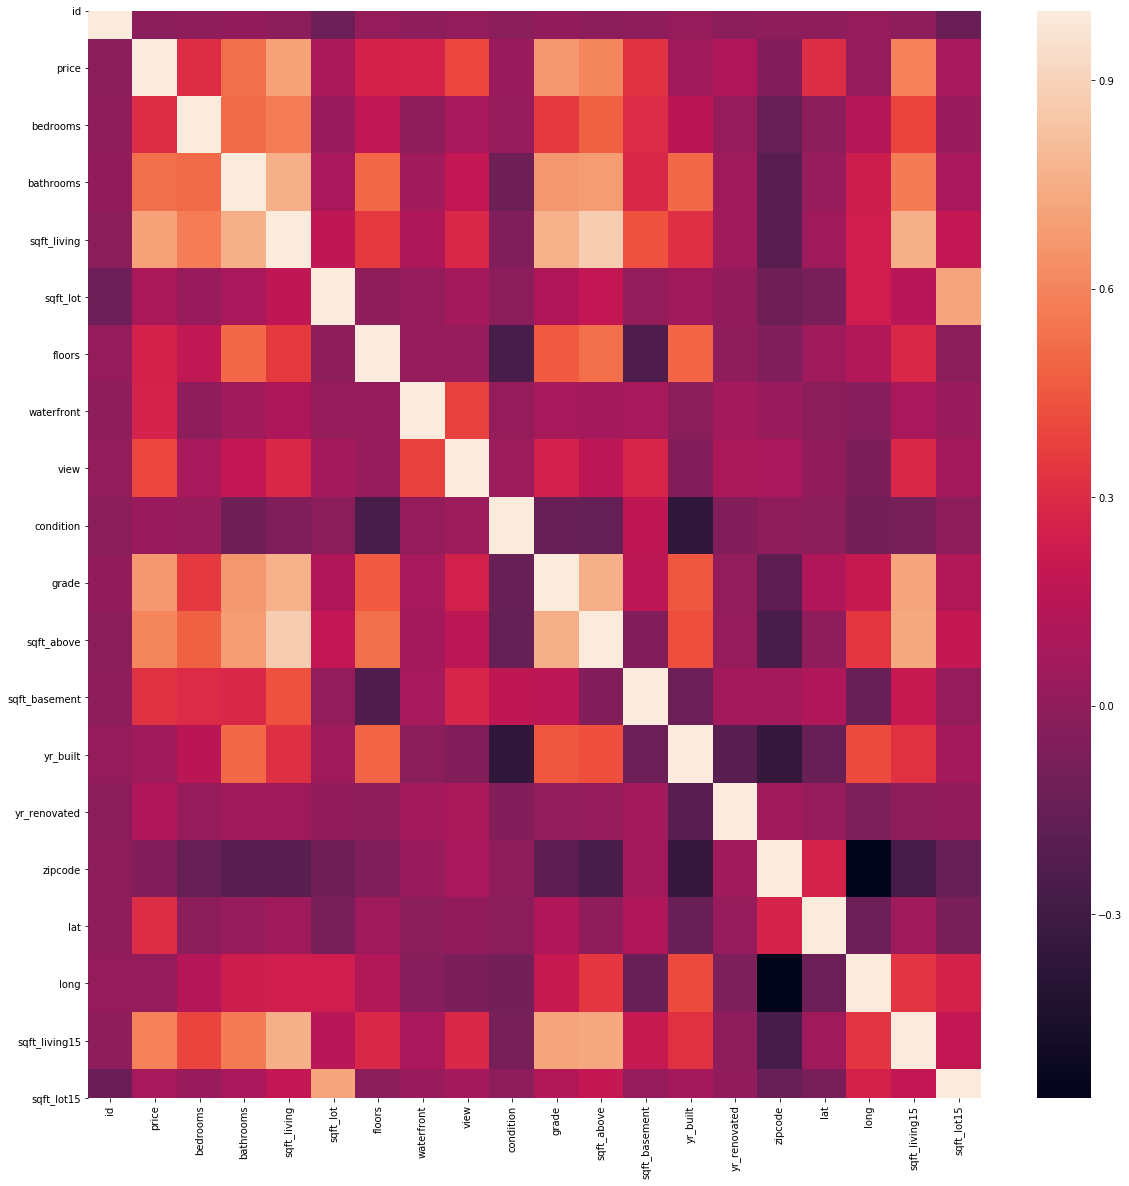

In [94]:
plt.figure(figsize = (20,20))
sns.heatmap(df_test1.corr())

In [95]:
df_base.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64